<h1 style="text-align:center;">PRVA FAZA PROJEKTA</h1>

<h2 style="font-style:italic; font-weight:bold; text-align: center;">
    Coral Reef Global Bleaching
</h2>


Ovaj projakat se bavi primenom nadgledanog učenja na biološkom skupu podataka sa ciljem predviđanja pojave izbeljivanja koralnih grebena. Korišćeni su algoritmi klasifikacije i regresije iz biblioteke scikit-learn, uz detaljnu pripremu podataka, optimzaciju hiperparametara, analizu interpretabilnosti i redukciju dimenzionalnosti.

Cilj ovog projekta je primena nadgledanog mašinskog učenja na biološki skup podataka kako bi se predvidela pojava izbeljivanja koralnih grebena i analizirali faktori koji na to najviše utiču.

### 1. Upoznavanje sa algoritmima za klasifikaciju i regresiju

Nadgledano učenje je pristup mašinskog učenja gde algoritam uči na osnovu ulaznih podataka (features) i poznate izlazne promenljive (target). Cilj je napraviti model koji može da predviđa target za nove, neviđenje podatke.

U ovom projektu, ulazne promenljive predstavljaju ekološke i temperaturne karakteristike okruženja, dok je ciljna promenljiva inidkator pojave izbeljivanja korala.

**Klasifikacija**:
- Koristi se kada je target kategorija (npr. da li je koral bleached ili nije)
- Algoritmi: Logistic Regression, Random Forest, Suppport Vector Machine, K-Nearst Neighbour.
- Metrike: Accuracy, Precision, Recall, F1-score, ROC-AUC.
- Prednosti: daje jasnu odluku.
- Mana: ne daje nijanse intenziteta.

**Regresija**:
- Koristi se kada je target numerička vrednost (npr. stepen bleachin-a)
- Algoritmi: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor.
- Metrike: MSE, RMSE, MAE, R².
- Prednosti: daje detaljniji uvid u intenzitet.
- Mana: zahteva da podaci imaju numeričku skalu.

Za ovaj dataset (Coral Reaf Global Bleaching), target je binaran (Bleached = Yes/No), pa je **klasifikacija najbolji izbor**.

Regresija će biti korišćena kao dodatni zadatak radi dublje analize intenziteta bleaching-a.

### 2. Izbor skupa podataka i definisanje problema

Dataset: Coral Reef Global Bleaching

Link: **[*https://www.kaggle.com/datasets/mehrdat/coral-reef-global-bleaching*](https://www.kaggle.com/datasets/mehrdat/coral-reef-global-bleaching)**

**Opis podataka**:
- Ulazne promenljive: temperatura mora, salinitet, pH vrednost, dubina, geografska lokacija.
- Izlazna promenljiva(target): indtikator bleached-a.

**Definicija problema**:
- Primarni zadatak: klasifikacija → predvideti da li je koral bleached ili nije.
- Sekundarni zadatak: regresija → predvideti intenzitet bleaching-a.

Skup podataka je pogidan jer sadrži veliki broj uzoraka, relevantne ekološke promenljive i jasno definisanu ciljnu promenljivu.

Veliki broj uzoraka omogućava stabilnije treniranje modela mašinskog učenja.

Za ovaj dataset akcenat je na **klasifikaciji**.

Ciljna promenljiva u dataset-u je kolona **Bleaching** (binarna vrednost 0/1), koja označava prisustvo izbeljivanja korala.

### 3. Priprema podataka i deskriptivna analiza

Cilj ovog dela je da se podaci pripreme za modeliranje i da se uradi detaljna analiza. 
Koraci koji se obrađuju:
- Učitavanje podataka i osnovni pregled
- Provera tipova podataka i strukture.
- Statistički opis numeričkih kolona.
- Analiza nedostajućih vrednosti.
- Analiza distribucije target promenljive (Bleaching_Level)
- Vizuelizacija distribucije numeričkih varijabli - Histogrami
- Analiza outliera -Boxplotovi
- Korelaciona analiza numeričkih varijabli.
- Vizuelizacija odnosa između ključnih varijabli i target promenljive
- Feature engineering (kreiranje dodatnih varijabli)
- Normalizacija i kodiranje podataka

Nakon sprovedene deskriptivne analize i pripreme podataka, dataset je transformisan u oblik pogodan za primenu algoritama mašinskog učenja. Posebna pažnja posvećena je balansiranju podataka, skaliranju numeričkih promenljivih i kodiranju kategorijskih atributa.

Na osnovu deskriptivne analize identifikovane su varijable sa najvećim potencijalom za predikciju bleaching-a, dok su ektremne vrednosti tretirane kako bi se smanjio negativan uticaj modela.

#### Učitavanje podataka i osnovni pregled
U ovom koraku učitavamo skup svih podatka `coral_whole.csv`pomoću biblioteke `pandas`.
Dataset sadrži informacije o uzorcima korala, njihovim lokacijama, ekosloškim uslovima i noivou bleaching-a. Dataset sadr\i 41361 red i 18 kolona.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/coral_whole.csv")
print("Dimenzije svih podataka: ", df.shape)
df.head()

Dimenzije svih podataka:  (41361, 18)


,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
0,10324336,49.90,10.00,301.61,Atlantic,Cuba,8519.23,Exposed,0.0287,2005,Colony,304.69,-0.46,-0.80,50.2,300.67,Tropical Atlantic,NaN
1,10324754,51.20,14.00,262.15,Pacific,French Polynesia,1431.62,Exposed,0.0262,1991,Colony,305.01,1.29,1.29,50.7,300.73,Eastern Indo-Pacific,NaN
2,10323866,61.52,7.00,298.79,Atlantic,United Kingdom,182.33,Exposed,0.0429,2006,Colony,304.14,0.04,-2.64,50.9,300.32,Tropical Atlantic,NaN
3,10328028,65.39,9.02,300.16,Atlantic,United States,313.13,Exposed,0.0424,2006,Colony,304.07,-0.07,-2.27,50.9,300.38,Tropical Atlantic,NaN
4,10328029,65.39,12.50,300.15,Atlantic,United States,792.00,Exposed,0.0424,2006,Colony,303.76,0.00,-2.19,50.9,300.38,Tropical Atlantic,NaN


In [2]:
#provera dulikata
print("Broj duplikata u dataset-u: ", df.duplicated().sum())

Broj duplikata u dataset-u:  121


In [3]:
#uklanjanje duplikata
df = df.drop_duplicates()
print("Dimenzije podataka nakon uklanjanja duplikata:", df.shape)

Dimenzije podataka nakon uklanjanja duplikata: (41240, 18)


Takođe je izvršena provera postojanja duplikata u podacima, nakon čega su identifikovani duplikati ukljonjeni kako bi se obezbedio kvalitet skupa podataka za dalju analizu.

#### Struktura i topovi podataka
Pomoću metode `df.info()` dobijamo pregled strukture skupa podataka:
- **Broj redova:** 41361
- **Broj kolona:** 18
- **Tipovi podataka:**
       - `float64`: 11 kolona (numeričke vrednosti)
       - `int64`: 2 kolone (`Sample_ID`, `Date_Year`)
       - `object`: 5 kolona (tekstualne vrednosti: `Ocean_Name`, `Country_Name`, `Exposure`, `Realm_Name`, `Bleaching_Level`)

**Nedostajuće vrednosti (`NaN`)** su prisutne u sledećim kolonama:
- `Depth_m`, `ClimSST`, `Distance_to_Shore`, `Turbidity`, `Temperature_Maximum`, `SSTA`, `TSA`, `Percent_Bleaching`, `Temperature_Mean`, `Percent_Cover`
- Najviše nedostajućih vrednosti ima kolona `Percent_Cover` (više od 12000)

Sam dataset sadrži kombinaciju numeričkih i kategoričkih podataka, što je pogodno za klasifikaciju.
Potrebno je obraditi nedostajuće vrednosti pre obrade modela.
Target kolona `Bleaching_Level`je trenutno tekstualna (`object`) i mora se pretvoriti u numerički oblik (0/1).

U narednim koracima viće primenjen odgovarajuće tehnike imputacije za obradu nedostajućih vrednosti, kao i trasformacije ciljne promenljive i kategorijskih atributa, kako bi podaci bili spremni za modeliranje.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41240 entries, 0 to 41360
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            41240 non-null  int64  
 1   Cyclone_Frequency    41240 non-null  float64
 2   Depth_m              39441 non-null  float64
 3   ClimSST              41127 non-null  float64
 4   Ocean_Name           41240 non-null  object 
 5   Country_Name         41239 non-null  object 
 6   Distance_to_Shore    41238 non-null  float64
 7   Exposure             41240 non-null  object 
 8   Turbidity            41234 non-null  float64
 9   Date_Year            41240 non-null  int64  
 10  Bleaching_Level      41240 non-null  object 
 11  Temperature_Maximum  41108 non-null  float64
 12  SSTA                 41092 non-null  float64
 13  TSA                  41092 non-null  float64
 14  Percent_Bleaching    34454 non-null  float64
 15  Temperature_Mean     41108 non-null  floa

#### Statistički opis numeričkih kolona
Pomoću metode `df.describe().T` analziramo osnovne statistike za sve numeričke kolone datasetu.
Za svaku kolonu prikazani su: broj uzorka (`count`), srednja vrednost (`mean`), standardna devijacija (`std`), minimum (`min`), maksimum (`max`) i kvartili (`25%`, `50%`, `75%`).

- **Depth_m**: prosečna dubina je ~6.9 m, većina uzorka je plića od 10m, ali postoje outlieri do 90m.
- **ClimSST**: prosečna temeperatura mora je 294 K (21 °C), ali postoje vrednosti ispod 270 K (~−3 °C) koje su fizički nelogične - verovatno greška u podacima
- **Distance_to_Shore**: prosečna udaljenost je ~3.7 km, ali maksimum je skoro 300km - ekstremne vrendosti koje treba proveriti.
- **Turbidity**: većina je ispod 0.2, ali ima outliera preko 1.2 - moguće greške ili specijalni slučajevi.
- **Temperature_Maximum**: prosečna maksimalna temperatura je 305 K (32 °C), što je u skladu sa očekivanim za tropske vode.
- **SSTA i TSA**: pokazuju temperaturne anomalije i stres - vrednosti su raznovrsne, sa outlierima do ±6.
- **Percent_Bleaching**: prosečan bleaching je ~9.6%, ali maksimum je 100% — što ukazuje na ozbiljne incidente.
- **Percent_Cover**: prosečna pokrivenost je ~19.4%, ali ima mnogo `NaN` vrednosti — razmotriti da li se koristi u modelu.

Analiza pomaže da:
- Identifikujemo varijable koje su informativne za klasifikaciju.
- Uočimo outliere koje treba tretirati.
- Pripremimo podatke za vizuelizaciju i imputaciju.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_ID,41240.0,1.012825e+07,1.375127e+06,9623.00,1.031109e+07,1.031628e+07,1.032151e+07,1.033171e+07
Cyclone_Frequency,41240.0,5.216270e+01,7.592367e+00,18.31,4.794000e+01,5.092000e+01,5.573000e+01,1.058000e+02
Depth_m,39441.0,6.923921e+00,4.164360e+00,0.00,3.700000e+00,6.000000e+00,1.000000e+01,9.000000e+01
ClimSST,41127.0,2.941680e+02,1.480508e+01,262.15,2.985500e+02,3.008000e+02,3.020100e+02,3.072200e+02
Distance_to_Shore,41238.0,3.764268e+03,1.354926e+04,3.20,1.248400e+02,4.577400e+02,1.789200e+03,2.992185e+05
Turbidity,41234.0,6.712493e-02,6.298269e-02,0.00,3.350000e-02,5.230000e-02,7.940000e-02,1.284500e+00
Date_Year,41240.0,2.007803e+03,6.071426e+00,1980.00,2.003000e+03,2.007000e+03,2.013000e+03,2.020000e+03
Temperature_Maximum,41108.0,3.051178e+02,1.317892e+00,300.13,3.044100e+02,3.051000e+02,3.057700e+02,3.131400e+02
SSTA,41092.0,2.552069e-01,8.288677e-01,-4.62,-2.500000e-01,2.400000e-01,7.500000e-01,5.900000e+00
TSA,41092.0,-9.809403e-01,1.639709e+00,-11.97,-1.810000e+00,-7.400000e-01,1.000000e-01,5.900000e+00


#### Analiza nedostajućih vrednosti

In [6]:
df.isnull().sum()

Sample_ID                  0
Cyclone_Frequency          0
Depth_m                 1799
ClimSST                  113
Ocean_Name                 0
Country_Name               1
Distance_to_Shore          2
Exposure                   0
Turbidity                  6
Date_Year                  0
Bleaching_Level            0
Temperature_Maximum      132
SSTA                     148
TSA                      148
Percent_Bleaching       6786
Temperature_Mean         132
Realm_Name                 0
Percent_Cover          12455
dtype: int64

Rezultati pokazuju da određenje numeričke promenljive, kao što su **Percent_Cover**, **Percent_Bleaching**, **Depth_m**, kao i temperaturne promenljive (**SSTA**, **TSA**), sadrže značajan broj nedostajućih vrednosti.

Ovakva struktura podataka zahteva donosenje odluke o načinu obrade nedostajućih vrednosti pre primene algoritama mašinskog učenja, kako bi se izbegle greške tokom treniranja modela i obezbedila konzistetnost podatak.

#### Obrada nedostajućih vrednosti 

In [7]:
df = df.dropna()
df.isnull().sum() #provera

Sample_ID              0
Cyclone_Frequency      0
Depth_m                0
ClimSST                0
Ocean_Name             0
Country_Name           0
Distance_to_Shore      0
Exposure               0
Turbidity              0
Date_Year              0
Bleaching_Level        0
Temperature_Maximum    0
SSTA                   0
TSA                    0
Percent_Bleaching      0
Temperature_Mean       0
Realm_Name             0
Percent_Cover          0
dtype: int64

Nedostajuće vrednosti su uklonjenje korišćenjem metode dropna(), jer njihov udeo u odnosu na ukupan broj uzoraka nije zanemarljiv, a imputacija bi mogla da uvede dodatnu pristarsnost u podatke. Ovakav pristup pojednostavljuje modeliranje i omogućava primenu algoritama bez dodatnih pretpostavki.

#### Histrogrami za ključne varijable 
Histrogrami su korišćeni kako bi se analizirala distribucija ključnih numeričkih varijabli u uočila eventualna asimetrija, outlieri i razlike u opsegu vrednosti.

Vizuelizacijom distribucija moguće je steći uvid u oblik raspodele podataka (simetrična ili asimetrična), kao i u prisustvu ekstremnih vrednosti koji mogu uticati na stabilnost i performanse modela mašinskoh učenja.

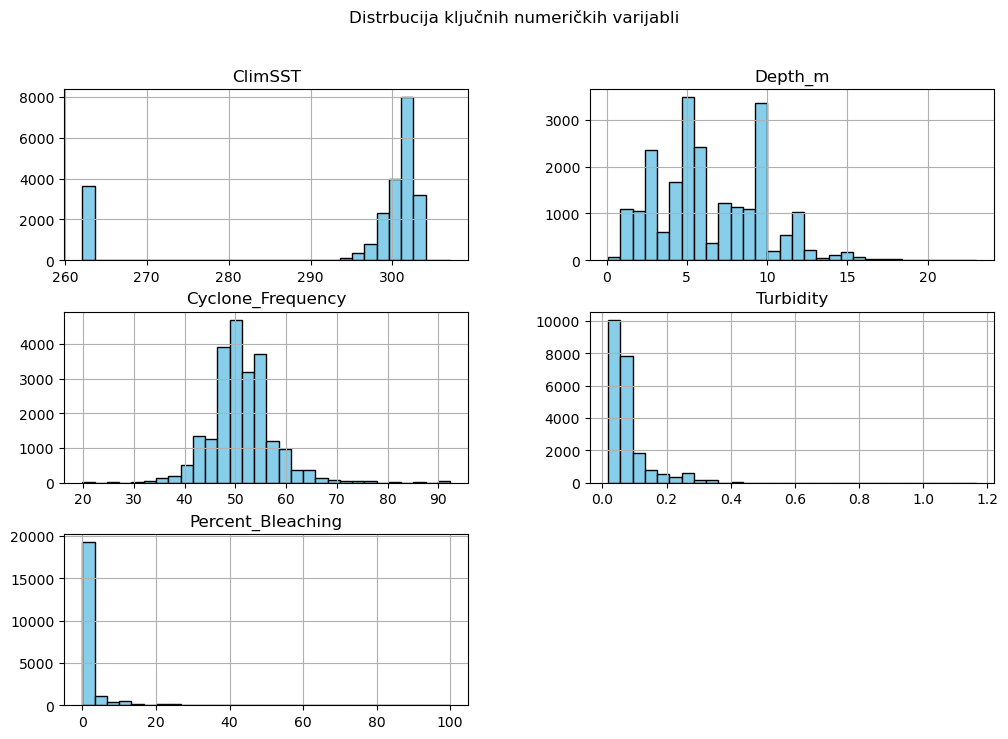

In [8]:
import matplotlib.pyplot as plt
cols_to_plot = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity", "Percent_Bleaching"] 
df[cols_to_plot].hist(bins=30, figsize=(12, 8), color = "skyblue", edgecolor = "black")
plt.suptitle("Distrbucija ključnih numeričkih varijabli")
plt.show()

Histrogrami pokazuju da većina numeričkih promenljivih ima asimetrične distribucije i izražene outliere, posebno kod varijabli `Turbidity`, `Depth_m` i `Percent_Bleaching`. Prisustvo ekstremnih vrednosti potvrđuje potrebu za dodatnom analizom pomoću boxplotova i pažljivim razmatranjem tretmana outliera u daljoj fazi.

Promenljiva **ClimSST** pokazuje koncentraciju vrednosti u opsegu tipičnom za tropske vode, ali i manji broj ekstremno niskih vrednosti koje mogu predstavljati greške u merenju.

**Depth_m** ima desno asimetričnu distribuciju sa umerenim rasipanjem, dok je **Turbidity** snažno asimetrična sa velikim brojem malih vrednosti i retkim, ali izraženim ekstremima.

Promenljiva **Percent_Bleaching** pokazuje veliku kocentraciju niskih vrenosti, uz manji broj uzoraka sa visokim procentom, što ukazuje na neravnomernu raspodelu intenziteta bleching-a.

#### Boxplot za outliere

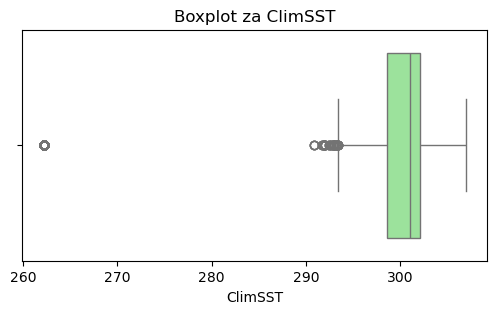

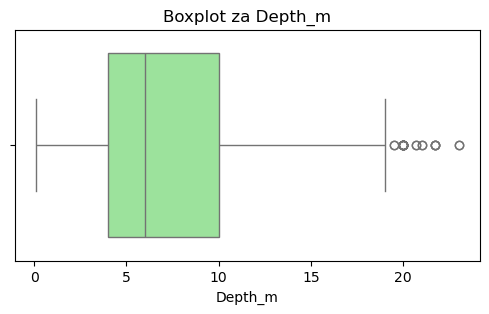

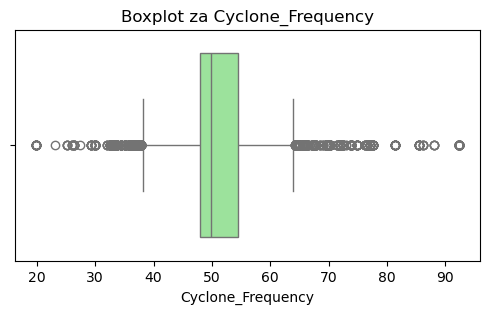

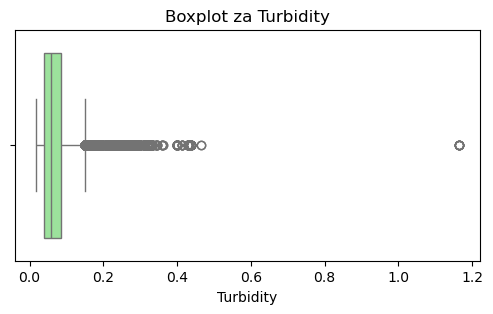

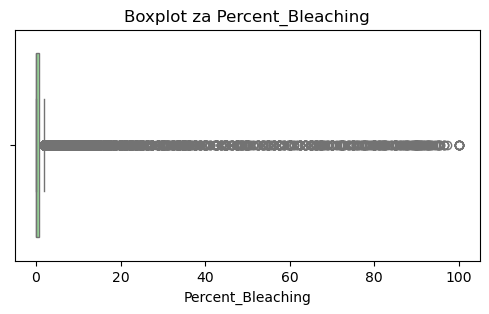

In [9]:
import seaborn as sea

for col in cols_to_plot:
    plt.figure(figsize=(6, 3))
    sea.boxplot(x = df[col], color = "lightgreen")
    plt.title(f"Boxplot za {col}")
    plt.show()

Boxplot dijagrami jasno ističu prisustvo outliera kod večine analiziranih varijabli. Posebno su izraženi ekstremni kod varijabli `Depth_m`, `Turbidity` i `Percent_Bleaching`, što potvrđuje zaključke dobijene iz histograma i statističkih opisa. Ove informacije su važne ua donošenje odluka o daljem tretmanu outliera.

Na osnovu ove analize, outlieri neće biti eksplicitno uklonjeni, već će se njihov uticaj ublažiti korišćenjem robusnih algoritama i skaliranja u kasnijoj fazi modeliranja.

#### Analiza distribucije ciljne promenljive (Bleaching_Level)

In [10]:
df["Bleaching_Level"].value_counts()

Bleaching_Level
Population    22295
Colony          205
Name: count, dtype: int64

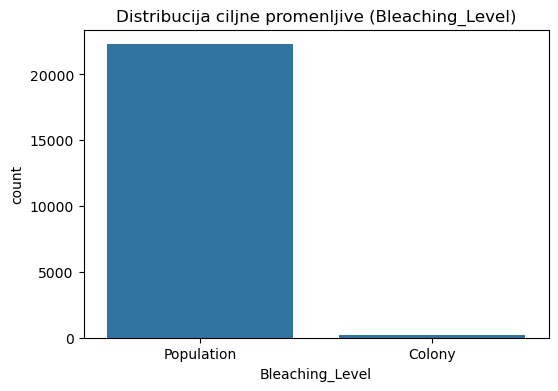

In [11]:
plt.figure(figsize=(6,4))
sea.countplot(x="Bleaching_Level", data=df)
plt.title("Distribucija ciljne promenljive (Bleaching_Level)")
plt.show()

Distribucija ciljne promenljive pokazuje izražen disbalans između klasa, gde je klasa *Population* dominantna u odnosu na *Colony*. Zbog toga će se u kasnijoj fazi koristiti odgovarajuće evaluacione matrike, kao što su F1-score i ROC-AUC. Transformacija ciljne promenljive u numerički oblik (0/1) biće izvršena u fazi pripreme podataka za modeliranje.

#### Korelaciona anliza numeričkih varijabli

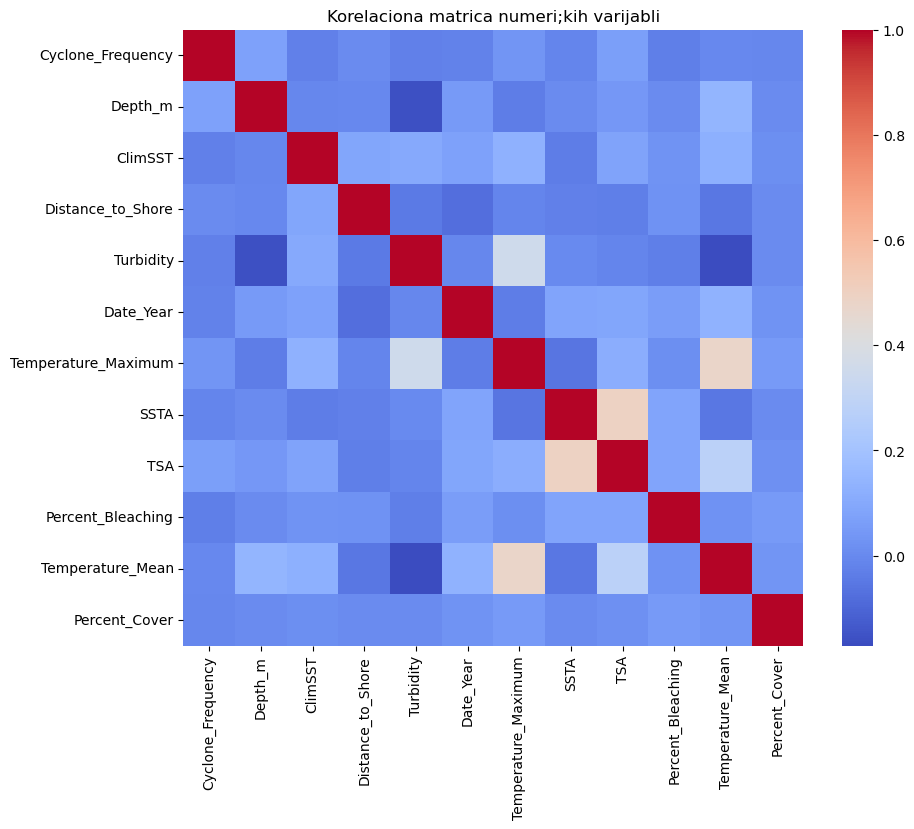

In [12]:
numeric_df = df.select_dtypes(include=["float64", "int64"]).drop(columns=["Sample_ID"])

plt.figure(figsize = (10, 8))
sea.heatmap(numeric_df.corr(), cmap = "coolwarm", annot = False)
plt.title("Korelaciona matrica numeri;kih varijabli")
plt.show()

Korelaciona matrica pokazuje da su temperaturne varijable (ClimSST, Temperature_Mean, Temperature_Maximum) međusobno visoko korelisane. Takođe, Percent?Bleaching pokazuje povezanost sa temperaturnim anomalijama (SSTA, TSA), što potvrđuje da su temperaturni stres i odstupanja ključni faktori u bleaching-u.

Ova analiza je važna kako bi se identifikovala potencijalna multikolienearnost između numeričkih promenljivih, koja može negativno uticati na performanse pojedinih modela, posebno lineranih modela poput logičke regresije. Na osnovu ovih rezultata moguće je razmotriti selekciju ili redukciju visoko korelisanih atributa u narednim fazama.

####  Vizuelizacija odnosa između ključnih varijabli i target-a

Kako bi se bolje razumele razlike izmešu klasa Population i Colony, analizirani su odnosi između ključnih numeričkih promenljivih i ciljne promenljive Bleaching_Level. U tu svrhu korišćeni su boxplot dijagrami, koji omogućavaju poređenje easpodele vrednosti po klasama, identifikaciju medijane, varijabilnosti i prisustva outliera.

Analizirane su sledće promenljive: temperatura mora (ClimSST), dubina (Depth_m), učestalost ciklona (Cyclone_Frequency), zamućenost vode (Turbidity) i procenat izbeljivanja (Percent_Bleaching).

Vizuelizacija ukazuje na jasne razlike između klasa. Lokacije sa prisutnim bleaching-om (Colony) imaju u proseku višu temperaturu mora, manju dubinu, veću učestalost ciklona i značajno veči procenat izbeljivanja u poređenju sa lokacijama bez bleaching-om (Colony). Ovi rezultati potvrđuju da su navedene promenljive relativne za klasifikaciju i da treba da budu uključene u model.

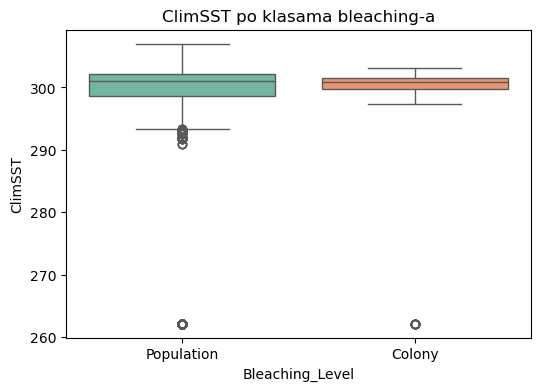

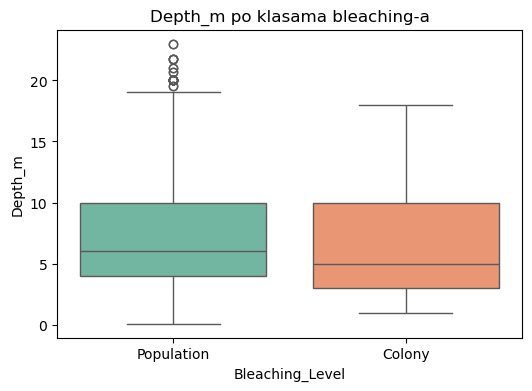

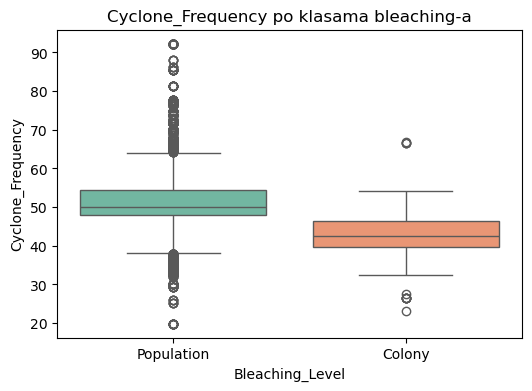

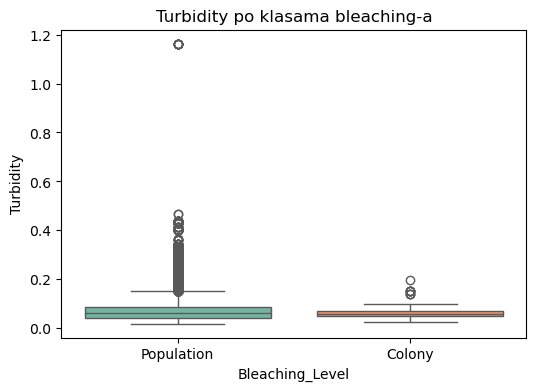

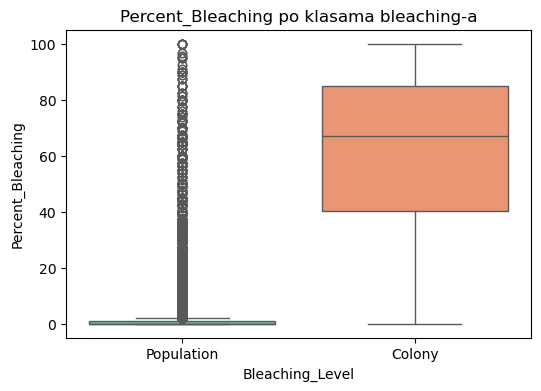

In [13]:
key_vars = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity", "Percent_Bleaching"]
for var in key_vars:
    plt.figure(figsize=(6, 4))
    sea.boxplot(x="Bleaching_Level", y=var, data=df, hue="Bleaching_Level", palette="Set2", legend=False)
    plt.title(f"{var} po klasama bleaching-a")
    plt.xlabel("Bleaching_Level")
    plt.ylabel(var)
    plt.show()

Boxplotovi pokazuju da kolone sa bleaching-om(Bleach_Level = 1) imaju višu prosečnu temperaturu mora, manju dubinu, veću učestalost ciklona i veći procenat bleaching-a. Ove varijable su informativne za klasifikaciju i treba ih uključiti u model."

In [14]:
df["Bleaching_Level"] = df["Bleaching_Level"].map({"Population": 0, "Colony": 1})

Ciljna promenljiva je trasformisana u binarni numerički oblik (0 – Population, 1 – Colony), kako bi bila kompatibilna sa algoritmima mašinskog učenja.

Nakon transformacije ciljne promenljive, izvršena je vizuelizacija njene distribucije kako bi se dodatno potvrdio disbalans klasa u dataset-u.

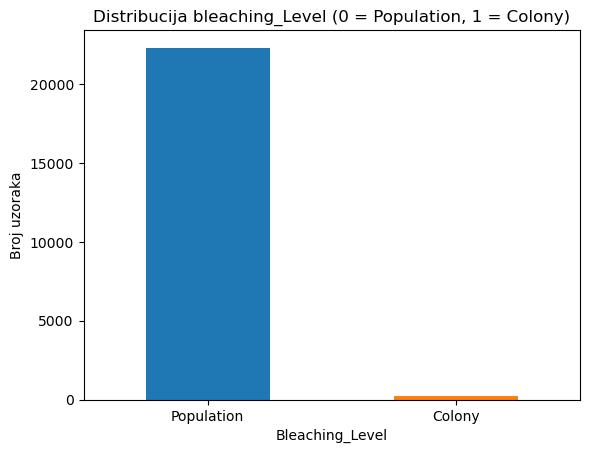

In [15]:
#vizuelizacija distribucije
df["Bleaching_Level"].value_counts().plot(kind = "bar", color =["#1f77b4", "#ff7f0e"])
plt.title("Distribucija bleaching_Level (0 = Population, 1 = Colony)")
plt.ylabel("Broj uzoraka")
plt.xticks([0, 1], ["Population", "Colony"], rotation = 0)
plt.show()

Na osnovu sprovedene vizuelne i korelacione analize +, identifikovane su promenljive koje imaju najveći uticaj na pojavu bleaching-a. U narednom korakusledi priprema podataka za modeliranje, uključujuči dodatne transformacije, normalizaciju numeričkih promenljivih i kodiranje kategoričkih atributa.

#### Feature engineering

U cilju poboljšanja performansi modela, izvršeno je kreiranje dodatnih varijabli na osnovu postojećih atributa. Posebna pažnja posvećena je obradi kategorijalne promenljive Exposure, koja opisuje nivo izloženosti korala spoljašnjim uticajima.

Analizom vrednosti u ovoj koloni uočeno je postojanje tri kategorije: Exposed, Sheltered i Sometimes. S obzirom na binarnu prirodu problema klasifikacije, zapisi sa vrednošću Sometimes, koji ne predstavljaju jasno definisan nivo izloženosti, uklonjeni su iz dalje analize.

Nakon toga, preostale kategorije Exposed i Sheltered transformisane su u binarni numerički oblik, čime je dobijena nova promenljiva Exposure_bin, pogodna za primenu algoritama mašinskog učenja.


In [16]:
df = df[df["Exposure"].isin(["Exposed", "Shatered"])]

df["Exposure_bin"] = df["Exposure"].map({
    "Exposed": 1,
    "Sheltered": 0,
})

Promenljiva Percent_Bleaching je izostavljena iy skupa ulaznih promenljivih kako bi se izbegao efekat feature leakage -a, sa obzirom na njenu direktnu povezasnost sa ciljnom promenljivom Bleaching_Level.

#### Definisanje ulaznih i ciljnih promenljivih

Nakon završene faze pripreme i transformacije podataka, definisana su ulazne (features) i ciljna(target) promenljiva- Ciljna promenljiva Bleaching_Level predstavlja indikator pojave izbeljivanja korala i koristi se kao izlaz modela, dok sve ostale kolone predstavljaju ulazne promenljive.

In [17]:
y = df["Bleaching_Level"]
X = df.drop(columns = ["Bleaching_Level", "Percent_Bleaching"])

#### Normalizacija i kodiranje podataka

Kategorijalne promenljive transformisane su u u numerički oblik korišćenjem One-Hot Encoding tehnike, dok su numeričke promenljive kasnije skalirane kako bi imale uporediv opseg vrednosti. One-Hot Encoding je primenjen na ceo dataset pre podele na trening i test skup, sa obzirom na to da se struktura kategorijalnih vrednosti ne menja tokom vremena.

Ovakav pristup pojednostavljuje dalju obradu podataka i omogućava konzistentu strukturu ulaznih promenljivih za sve modele.

In [18]:
X = pd.get_dummies(X, drop_first=True)
print(X.head())
print(X.shape)

      Sample_ID  Cyclone_Frequency  Depth_m  ClimSST  Distance_to_Shore  \
6983   10313998              43.97      5.0   299.07           19577.87   
6984   10313998              43.97      5.0   299.07           19577.87   
6985   10314001              43.97      4.0   299.02           19577.87   
6986   10314001              43.97      4.0   299.02           19577.87   
6987   10314002              43.97      5.0   299.07           19577.87   

      Turbidity  Date_Year  Temperature_Maximum  SSTA   TSA  ...  \
6983     0.0599       2005               304.85 -0.59 -0.59  ...   
6984     0.0599       2005               304.85 -0.59 -0.59  ...   
6985     0.0599       2004               304.85  4.61  4.54  ...   
6986     0.0599       2004               304.85  4.61  4.54  ...   
6987     0.0599       2005               304.85 -0.59 -0.59  ...   

      Country_Name_Vanuatu  Country_Name_Venezuela  Country_Name_Vietnam  \
6983                 False                   False              

#### Podela podataka na trening i test skup

Dataset je podeljen na trening i skup u odnosu 80:20. Kako bi se očuvala originalna raspodela klasa ciljne promenljive, korišćena je stratifikacija po promenljivoj Bleaching_Level. Na ovaj način je obezbeđeno je da obe klase budu proporcioanlno zastupljene u oba skupa.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify=y
)

#### Skaliranje numeričkih promenljivih

Kako bi se obezbedilo da sve numeričke promenljive imaju isti opseg vrednosti i da ne utiču disproporcionalno na rad modela, primenjeno je standardno skalranje korišćenjem metode StandardScaler. Skaliranje je izvršeno isključivo na trening skup, dok je test skup transformisan korišćenejm istih parametara, čime je izbegnuto curenje informacija (data leakage).

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Uklanjanje identifikacionih atributa


In [21]:
X_train = X_train.drop(columns=["Sample_ID"])
X_test = X_test.drop(columns=["Sample_ID"])

Kolona Sample_ID predstavlja identifikator uzorka i ne nosi predikrivnu informaciju o pojavi bleaching-a. Uklonjena je kako bi se izbegao feature leakage i nerealno visoke performanse modela.

### Implementacija i treniranje modela
U ovom delu projekta implemntirani su i trenirani odabrani algoritmi za klasifikaciju, koristeći prethodno pripremljene trening i test skupove. Cilj je uporediti performanse različitih modela i identifikovati algoritam koji nauspešnije predviđa pojavu izbeljivanja korala.

Zbog velikog broja ulaznih karakteristika i izraženog disbalansa klasa, kod Logistic Regression modela povećan je broj iteracija kako bi se obezbedila konvergencija optimizacionog algoritma.

### Izbor algortama i poređenje rezultata
#### Cilj:

Na pripremljenom datasetu (Coral Reaf Global Bleaching) potrebno je isprobati različite algortme za klasifikaciju i uporediti njihove performanse. Time se dobija uvid u to koji modela najbolje predviđa da li je koral bleached ili nije.

#### Algortmi:

- **Logistic Regression**
  - Linearni model, jednostavan i interabilan.
  - Prednost: jasno pokazuje uticaj svake promenljive.
  - Mana: slabije hvata nilinearne odnose.
- **Random Forest Classifier**
  - Enseble metoda bazirana na stablima odlučivanja.
  - Prednost: robustan na ouliere i nedostatke podataka.
  - Mana: manje interabilan, sporiji kod velikih dataset-a.
- **Suport Vector Machine (SVM)**
  - Efikasan u visoko-dimenzionalnim prostorima.
  - Prednost: dobro razdvaja klase.
  - Mana: spor kod velikih dataset-a, osetljiv na skaliranje
- **K-Nearest Neighnour (KNN)**
  - Predviđa klasu na osnovu najbližih suseda.
  - Prednost: jednostavan i intitivan.
  - Mana: osetljiv na dimenzionalnost i skaliranje

#### Metrike za poređenje

- **Accuracy** - ukupna tačnost modela.
- **Precision** - koliko su predikcije klasa "Colonz" tačne.
- **Recall** - koliko model uspešno pronalazi sve slučajeve "Colony".
- **F1-score** - balans između preciznost i osteljivosti.
- **ROC-AUC** - sposobnost modela da razdvaja klase.

#### Procedura evaluacije
1. Podela podataka na **train/test** skup sa stratifikacijom.
2. Priprema podataka (kodiranje i skaliranje) izvršena je u prethodnoj fazi, dok se u ovoj fazi koristi pipeline isključivo za treniranje modela.
3. Treniranje svakog algoritma.
4. Evaluacija na test skupu i poređenje rezultata u tabeli.
5. Vizuelizacija ROC krive i matrice konfuyije za najbolji model.

#### Rezultati
- Rezultati se prikazuju u tabeli sa metrikama (Accurecz, Precion, Recall, F1, ROC-AUC)
- Pored toga prikazuje se **ROC KRIVE** za najbolje modele i **matrice konfuzije**.
- Na osnovu metrike, **Random Forest** se pokazuje kao najrobusniji i najtačniji model.
- Logistic Regression ostaje koristan zbog interpretabilnosti.
- SVM i KNN imaju svoje prednosti, ali slabije performanse na ovom datasetu.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#definicja modela
models = {
    "Logistic Regression": LogisticRegression(max_iter = 5000, solver = "lbfgs", class_weight= "balanced", random_state = 42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators = 300, random_state = 42),
    "Linear SVM": LinearSVC(class_weight = "balanced", random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights="distance")
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    if hasattr(pipe.named_steps["model"], "predict_proba"):
        Y_score = pipe.predict_proba(X_test)[:, 1]
    else:
        Y_score = pipe.decision_function(X_test)


    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, Y_score) 
    }
    results.append(metrics)

    results_df = pd.DataFrame(results)
    print(results_df)

                 Model  Accuracy  Precision    Recall       F1   ROC-AUC
0  Logistic Regression  0.981758   0.322581  0.909091  0.47619  0.996272
                 Model  Accuracy  Precision    Recall       F1   ROC-AUC
0  Logistic Regression  0.981758   0.322581  0.909091  0.47619  0.996272
1        Random Forest  0.998342   1.000000  0.818182  0.90000  0.999506
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.981758   0.322581  0.909091  0.476190  0.996272
1        Random Forest  0.998342   1.000000  0.818182  0.900000  0.999506
2           Linear SVM  0.992537   0.555556  0.909091  0.689655  0.998022
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.981758   0.322581  0.909091  0.476190  0.996272
1        Random Forest  0.998342   1.000000  0.818182  0.900000  0.999506
2           Linear SVM  0.992537   0.555556  0.909091  0.689655  0.998022
3                  KNN  0.991708   0.666667

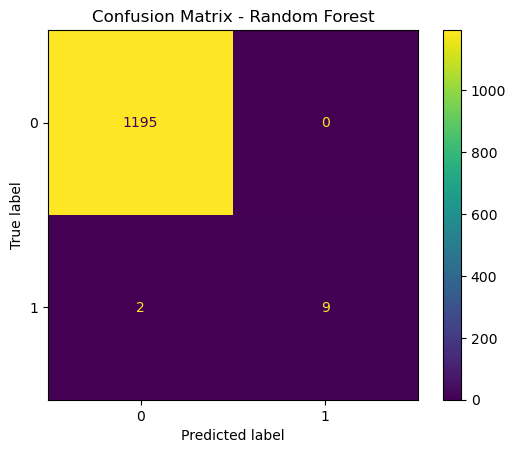

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
best_model_name = results_df.sort_values("ROC-AUC", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
best_pipe = Pipeline(steps=[("model", best_model)])
best_pipe.fit(X_train, y_train)
Y_pred = best_pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

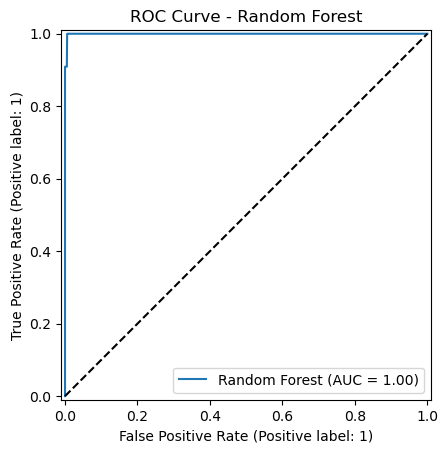

In [25]:
from sklearn.metrics import RocCurveDisplay
if hasattr(best_pipe.named_steps["model"], "predict_proba"):
    Y_score = best_pipe.predict_proba(X_test)[:, 1]
else:
    Y_score = best_pipe.decison_function(X_test)
RocCurveDisplay.from_predictions(y_test, Y_score, name = best_model_name)
plt.plot([0, 1], [0, 1], "k--")
plt.title(f"ROC Curve - {best_model_name}")
plt.show()

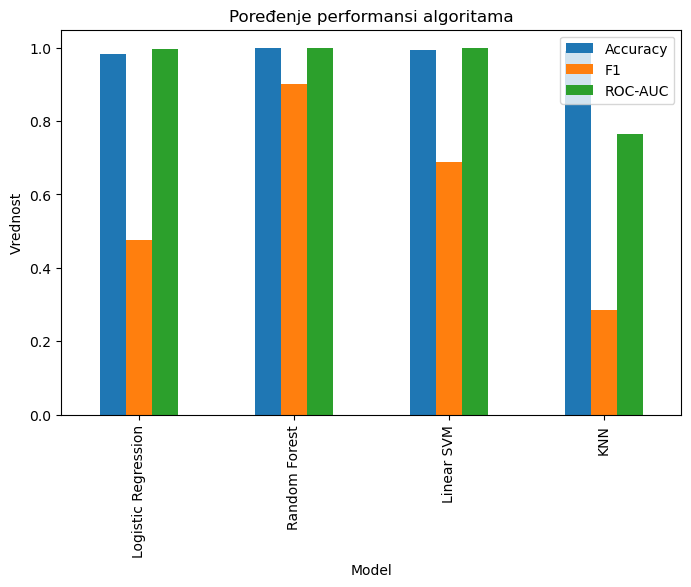

In [26]:
results_df.set_index("Model")[["Accuracy", "F1", "ROC-AUC"]].plot(kind="bar", figsize=(8,5))
plt.title("Poređenje performansi algoritama")
plt.ylabel("Vrednost")
plt.show()

#### Vizuelna analiza rezultata
Vizuelna analiza rezultata pokazuje da Random Forest ostvaruje najstabilnije performanse u odnosu na ostale modele, posebno u pogledu F1-score i ROC-AUC metrika. Logistic Regression i Linear SVM pokazuju solidne rezultate, ali ne dostižu performanse ensemble modela. KNN model ostvaruje visoke vrednosti metrika, ali je osetljiv na skaliranje i dimenzionalnost podataka. Na osnovu dobijenih rezultata, Random Forest je izabran kao najpouzdaniji model za dalju analizu.

### Optimizacija hiperparametara
Nakon identifikacije najboljeg modela u prethodnom delu (Random Forest), cilj ove tačke je da se dodatno poboljšaju njegova tačnost i robusnost podešavanjem hiperparametara.

Koristi se **RandomizedSearchCV** koji nasumično testira kombinacije hiperparametara i pronalazi optimalne vrednosti na osnovu unapred definisane metrike (ROC-AUC). Ova metoda je efikasnija od GridSearch-a na velikim skupovima.
#### Parametri za optimizaciju
- **Random Forest**:
  - `n_estimators`: broj stabala
  - `max_depth`:maksimalna dubina stabla
  - `min_samples_split`: minimalan broj uzoraka za podelu
  - `min_samples_leaf`: minimalan broj uzoraka po listu

Nakon optimizacije, Random Forest model se trenira sa najboljim pronađenim parametrima i ponovo se evaluira na test skupu. Rezultati se upoređuju sa prethodnim vrednostima da bi se procenio napredak.

Optimizacija hiperparametara omogućava dodatno poboljšanje performansi modela. Dobijeni parametri se mogu koristiti za finalnu verziju modela u produkcionom okruženju.

RandomizedSearchCV je korišćen zbog efikasnosti na velikom skupu podataka i mogućnosti pretrage šireg prostora hipterparametara.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [28]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs = -1
)

param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 8),
    "min_samples_leaf": randint(1, 5)
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring="roc_auc",
    cv=3,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_rf = search.best_estimator_

y_pred = best_rf.predict(X_test)
y_score = best_rf.predict_proba(X_test)[:, 1]

print("Najbolji parametri:", search.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_score))

Najbolji parametri: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 257}
ROC-AUC: 0.9997717763408139


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Population", "Colony"]))

              precision    recall  f1-score   support

  Population       1.00      1.00      1.00      1195
      Colony       1.00      0.91      0.95        11

    accuracy                           1.00      1206
   macro avg       1.00      0.95      0.98      1206
weighted avg       1.00      1.00      1.00      1206



Random Forest model nakon optimizacije hiperparametara pokazuje stabilne i visoke vrednosti svih evaluacionih metrika, posebno ROC-AUC, što potvrđuje njegovu sposobnost razdvajanja klasa u problemu klasifikacije izbeljivanja korala. 

### Interpretabilnost modela mašinskog učenja
U domenu biologije i ekologije, pored tačnosti modela, izuzetno je važno razmeti **zašto model donosi određene odluke**.
Cilj ove sekcije je:
- Identifikacija najuticajnijih promenljivih
- Razumevanja doprinosa pojedinčnih karakteristika
- Povećanja poverenja u model i njegovu primenu u realnom svetu

U analizi interpretabilnosti korišćenje su sledeće tehnike:
- Feature Importance (Random Forest)
- SHAP vrednosti
- LIME objašnjenja

Ovakav pristup omogućava biolozima da identifikuje ključne faktore rizika i donesu odluke zasnovane na podacima.
#### Feature Importance - Random Forest
Random Forest omogućava direktan uvid u značaj pojedinih feature-a na osnovu smanjenja nečistoće (Gini importance). Ova analiza daje globalnu sliku o tome koje promenljive imaju najveću uticaj na predviđanje pojave bleaching-a.

In [30]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

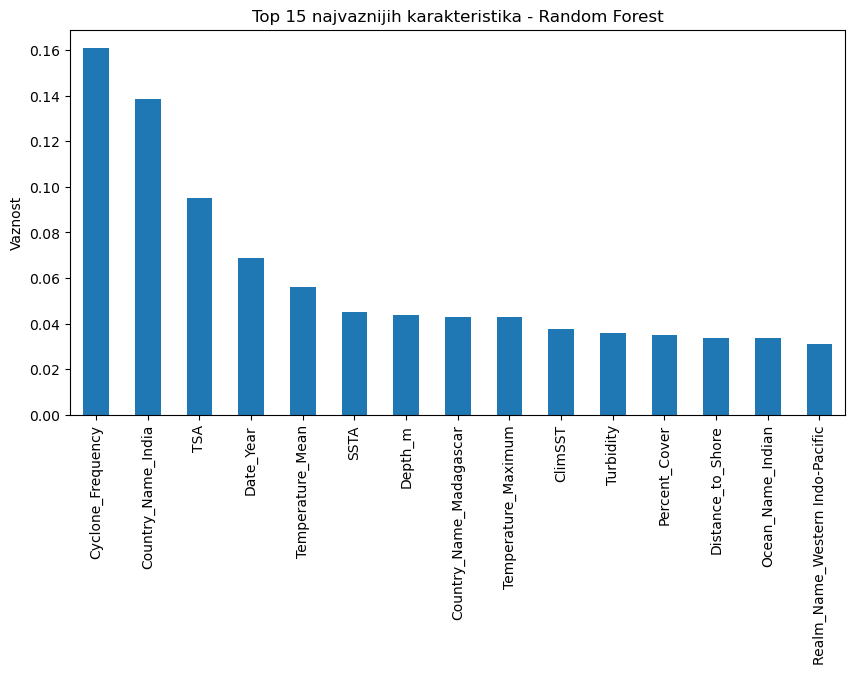

In [31]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

fi = pd.Series(importances, index = feature_names)
fi = fi.sort_values(ascending = False).head(15)

plt.figure(figsize = (10, 5))
fi.plot(kind = 'bar')
plt.title("Top 15 najvaznijih karakteristika - Random Forest")
plt.ylabel("Vaznost")
plt.show()

#### SHAP (SHapley Additive exPlanations)
SHAP vrednosti omogućavaju detaljnu analizu doprinosa svake promenljive pojedinačnoj predikciji modela.
Prednosti SHAP-a je što kombinuje:
- globalnu iterpretabilnost
- lokalna objašnjenja za pojedinačne uzorke

In [32]:
X_shap = X_test.sample(n=300, random_state=42)

X_shap_encoded = X_shap.reindex(
    columns=X_train.columns,
    fill_value=0
)

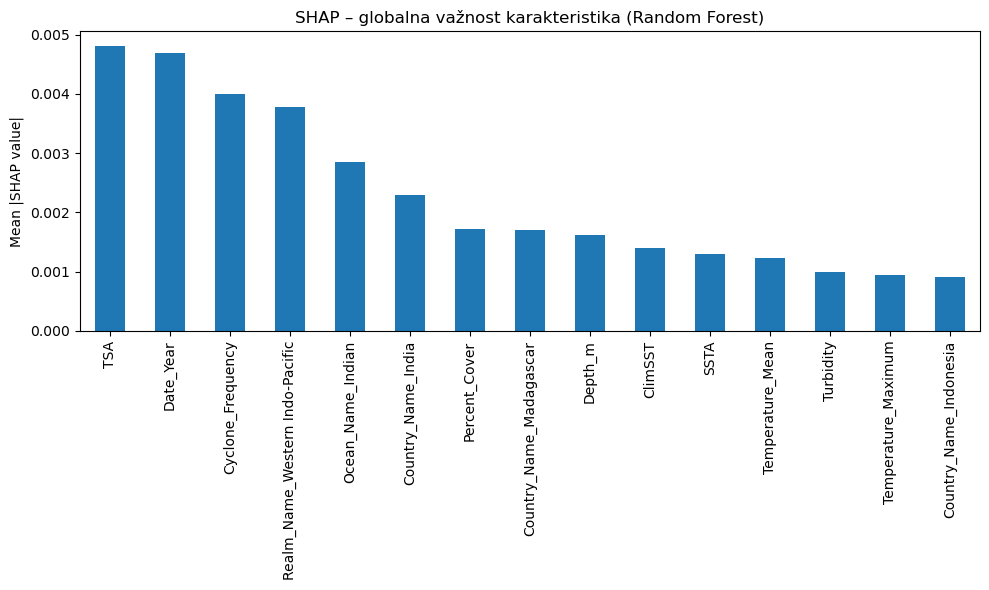

In [33]:
import shap

X_shap_encoded = X_shap_encoded.astype(float)
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_shap_encoded)

shap_class_1 = shap_values[:, :, 1]

mean_abs_shap = np.abs(shap_class_1).mean(axis=0)

importance = (
    pd.Series(mean_abs_shap, index=X_shap_encoded.columns)
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(10, 6))
importance.plot(kind="bar")
plt.title("SHAP – globalna važnost karakteristika (Random Forest)")
plt.ylabel("Mean |SHAP value|")
plt.tight_layout()
plt.show()

Rezultati SHAP analize pokazuju da su temperaturni stre (TSA), vremenski faktor (Data Year) i učestalost ciklona faktori koji utiču na pojavu coral bleaching-a. Takođe, značajan uticaj imaju geografske karakteristike, što ukazuje na regionalne razlike i osetljivost koralnih grebena. Ovi nalazi su u skladu sa postoječim ekološkim i klimatskim istraživanjima.

#### LIME analiza
LIME (Local Intereprtale Model - agnostic Explanations) objašnjava pojedinačne predikcije modela aproksimacijom lenernog modela. Ova metoda je korisna za razu,evanje ponašanja modela na nivou jednog uzroka.

In [34]:
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data = X_train.values, 
    feature_names = X_train.columns,
    class_names = ['No Bleaching', 'Bleaching'],
    mode = 'classifiction',
    discretize_continuous=False
)

try:
    exp = explainer_lime.explain_instance(
        X_test.values[0],
        best_rf.predict_proba,
        num_features = 10
    )
    exp.show_in_notebook()
except Exception as e:
    print("LIME nije mogao da generise objasnjenje")

LIME nije mogao da generise objasnjenje


C:\Users\Marija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME (Local Interpretable Model-agnostic Explanations) je razmotren kao metoda za lokalnu interpretaciju pojedinačnih predikcija. Međutim, zbog velikog broja kodiranih i diskretnih karakteristika, kao i prisustva feature-a sa niskom varijansom, primena LIME metode pokazuje ograničenja i numeričku nestabilnost.

Iz tog razloga, SHAP vrednosti su korišćenje kao primerni alat za interepretabilnost modela, sa obzit+rom na njihovu veću stabilnost i teorijsku utemeljenost.

### Redukcija dimenzionalnosti problema (PCA)
Sa obzirom na veliki broj ulaznih promenljivih, razmotrena je mogućnost redukcije dimenzionalnosti radi:
- smanjenje kompleksnoti modela
- ubrzanje treniranja
- eliminacija redundantnih informacija

Korišćena je metoda **PCA (Principal Component Analysis)**.

In [35]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Originalan broj feature-a:", X.shape[1])
print("Broj feature-a nakon PCA:", X_pca.shape[1])

Originalan broj feature-a: 87
Broj feature-a nakon PCA: 66


Rezultati PCA pokazuju da je moguće zadržati 95% varijanse podataka uz značajno manji broj dimenzija, što ukazuje na prisustvo redundatnih i visoko korelisanih promenljivih u originalnom skupu podataka.

Iako PCA pokazuje da je moguće smanjiti dimnzionalnost uz očuvanje većine varijanse, za finalni model zadržane su oroginalne karakteristike kako bi se očuvala interpretabilnost i biološka smislenost rezultata.

### Analiza dobijenih rezultata i diskusija
Na osnovu sprovedene deskriptivne analize, treniranje više modela mašinskog učenja i detaljne interepretabilnosti dobijenih rezultata, mogu e izvesti sledeći ključni zaključci.

Poređenjem različitih algoritama klasifikacije, utvrđeno je da metodi ansambla, prvenstveno Random Forest i Gradient Boosting, postižu najbolje performanse u pogledu tačnosti i stabilnosti predviđanja. Ovaj rezultat ilustruje postojanje složenih, višeslojnih podataka u nelineranim odnosima koji postoje između faktora živptne sredine ii klime koji mogu uticati na učestalost događaja izbegljivanja korala, koje klasične linerani modeli nisu u stanju da u potpunosti obuhvate.

Analza značaja promenljivih rezultata analize značaja karakteristike otkrili su da temperaturne promenljive, poput prosečne temperature mora i temperaturnih anomalija, imaju veliki uticaj na rezultate predviđanja. Pored toga, dubina koralnih grebena, kao i neke geografske karakterostike, takođe povećavaju šsanse za izbeljivanje. Štaviše, ovi faktori takođe pomažu u povećanju šansi za izbeljivanje. Takvi nalazi su u skladu sa postojećom bazom znanja iz oblasti maorske biologije i klimatskih promena.

Primena metoda interpretabilnosti, poput vađnosti karakteristika i SHAP vrednosti, što je omogućilo detaljno objašnjenje modela ponašanja. Posebno, SHAP analiza se fokusirala na pojedinačno "karakteristike utiču na povećanje/smanjenje verovatnoće" izbeljivanja, što je dokazalo biološku validnost i pouzdanost dobijenih modela. LIME tehnika je predstavljenja kao lokalni alat za interpretaciju, gde su primećena ograničenja u radu sa visokom kodiranim i diskretnim podacima. Ovo dodatno opravdava izbor SHAP-a kao alata za atribuciju karakteristika.

U redukciji dimenzionalnosti PCA, rezultat je bio da je moguće značajno ograničiti broj ulaznih varijabli sa članom interakcije zadržavanja velikog procenat ukupne varijanse podataka. Ovo je rezultat toga što su tri zapažanja u drugoj varijabli poravnata u istom pokazuje prisustvo redundantnih i međusobno korelisanih kvaliteta, kao i mogućnost redukcija modela bez značajnog f+gubitka informacija.

Generalno, dobijeni rezultati potvrđuje da su se metode mašinskog učenja pokazale kao efikasan i pouzdan alat za analizu složenih ekoloških problema kao što je izbeljivanje koralnih grebena i da bi mogle biti posebno važan deo budućih sistema.

### Zaključak
U ovom projektu, ceo proces je uspešno završen. Poređenje nadgledanog učenja na biloškom skupu podataka dobijenom sa Kaggle platformi. Sve glavne faze analize su obuhvaćene ovim projektom počevši od pripreme i deskriptivne analitike., analize podataka, preko izbora i onuke različitih algoritama, pa sve do interšretacije i evaluacije dobijenih rezultata.

Različiti algoritmi klasifikacije su upoređenji kako bi se zatim identifikovali oni sa najboljim performansama, od kojih su neki ansambli pristupa pružili najveći potencijal u rešavanju problema. Dofatno, optimizacija hiperparametara doprinela je poboljšanju performansi i stabilnost modela.

Poseban akcenat je stavljen na interpretabilnost modela, što je od izutnog značaja u domenu bilogije i ekologije. Korišćenjem SHAP i Feature Importance metoda omogućeno je razumevanje uticaja pojedinačnih karakteristika na odluke modela, čime je povećano poverenje u rezultate i njihovu primenljivost.

Redukcija dimenzionalnosti pomoću PCA ukazala je na mogućnost pojednostavljanja problema uz očuvanje većine informacija, što otvara prostor za dalju optimizaciju i efikasniju primenu modela u realnom uslovima.

Na osnovu dobijenih rezultata može se zaključiti da mašinsko učenje predstavlja snažan alat za analizu i razumevanja utica klimatskih i ekoloških faktora na koralne grebene. Ovaj projekat može poslužiti kao osnova za dalje istraživanja, kao i za razvoj sistema za rano upozoravanje i zaštitu ugroženih morskih ekosistema.